# Setup and imports

In [16]:
import os
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter

# Load the Data

In [6]:
# define the path  to the data folder
data_dir = '/Users/nataliamarko/Documents/GitHub/mnist-classifier-oop/task_2/data/'

def load_data(data_dir):
    categories = []
    num_images = []
    image_shapes = {}
    
    for category in os.listdir(data_dir):
        category_dir = os.path.join(data_dir, category)
        # Skip any non-directory files or hidden directories like `.ipynb_checkpoints`
        if not os.path.isdir(category_dir) or category.startswith('.'):
            continue
        if os.path.isdir(category_dir):
            categories.append(category)
            images = os.listdir(category_dir)
            num_images.append(len(images))
            
            for image in images:
                image_path = os.path.join(category_dir, image)
                with Image.open(image_path) as img:
                    if img.size in image_shapes:
                        image_shapes[img.size] += 1
                    else:
                        image_shapes[img.size] = 1

    return categories, num_images, image_shapes

categories, num_images, image_shapes = load_data(data_dir)
categories

['cat',
 'butterfly',
 'dog',
 'sheep',
 'spider',
 'chicken',
 'horse',
 'squirrel',
 'cow',
 'elephant']

# Analyze Class Distribution

In [8]:
# Display class distribution
for cat, num in zip(categories, num_images):
    print(f"{cat}: {num}")

cat: 1668
butterfly: 2112
dog: 4863
sheep: 1820
spider: 4821
chicken: 3098
horse: 2623
squirrel: 1862
cow: 1866
elephant: 1446


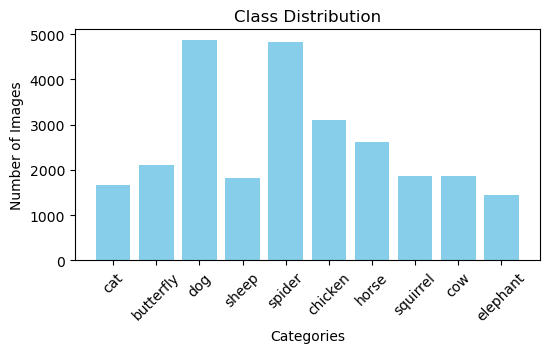

In [9]:
# visualize distribution
plt.figure(figsize=(6, 3))
plt.bar(categories, num_images, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

# Plots the distribution of image sizes

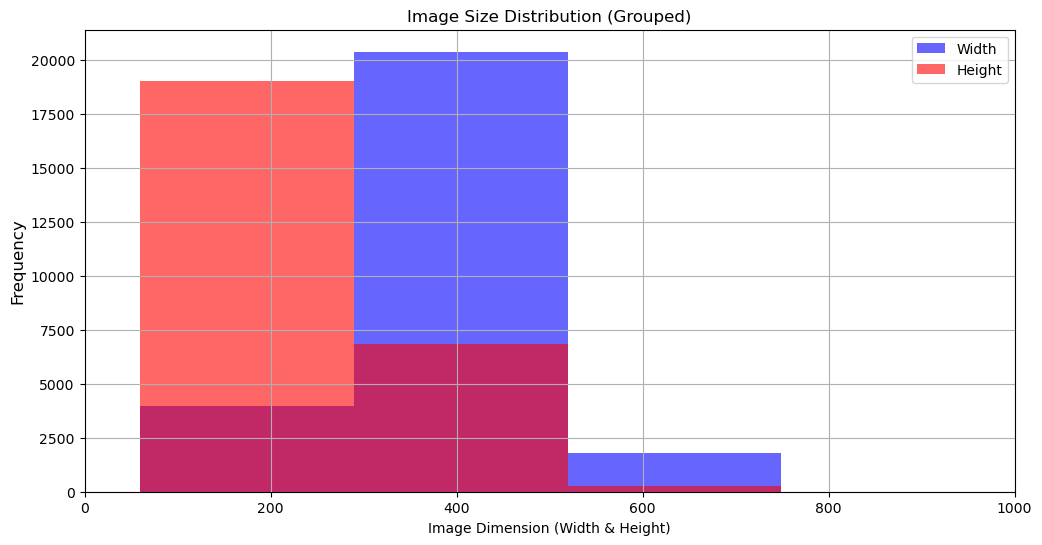

In [11]:
# Extract widths and heights separately
widths = [size[0] for size in image_shapes.keys()]
heights = [size[1] for size in image_shapes.keys()]
frequencies = list(image_shapes.values())

# Create bins (group similar sizes)
bins = np.linspace(min(widths), max(widths), num=30)  # 30 bins for clarity

plt.figure(figsize=(12, 6))
plt.hist(widths, bins=bins, weights=frequencies, alpha=0.6, color='blue', label='Width')
plt.hist(heights, bins=bins, weights=frequencies, alpha=0.6, color='red', label='Height')

# Set x-axis limits if necessary (e.g., remove outliers above 1000px)
plt.xlim(0, 1000) 
plt.xlabel("Image Dimension (Width & Height)")
plt.ylabel("Frequency", fontsize=12)
plt.title("Image Size Distribution (Grouped)")
plt.legend()
plt.grid(True)
plt.show()


# Get a visual feel of the data, display a few sample images from each class:

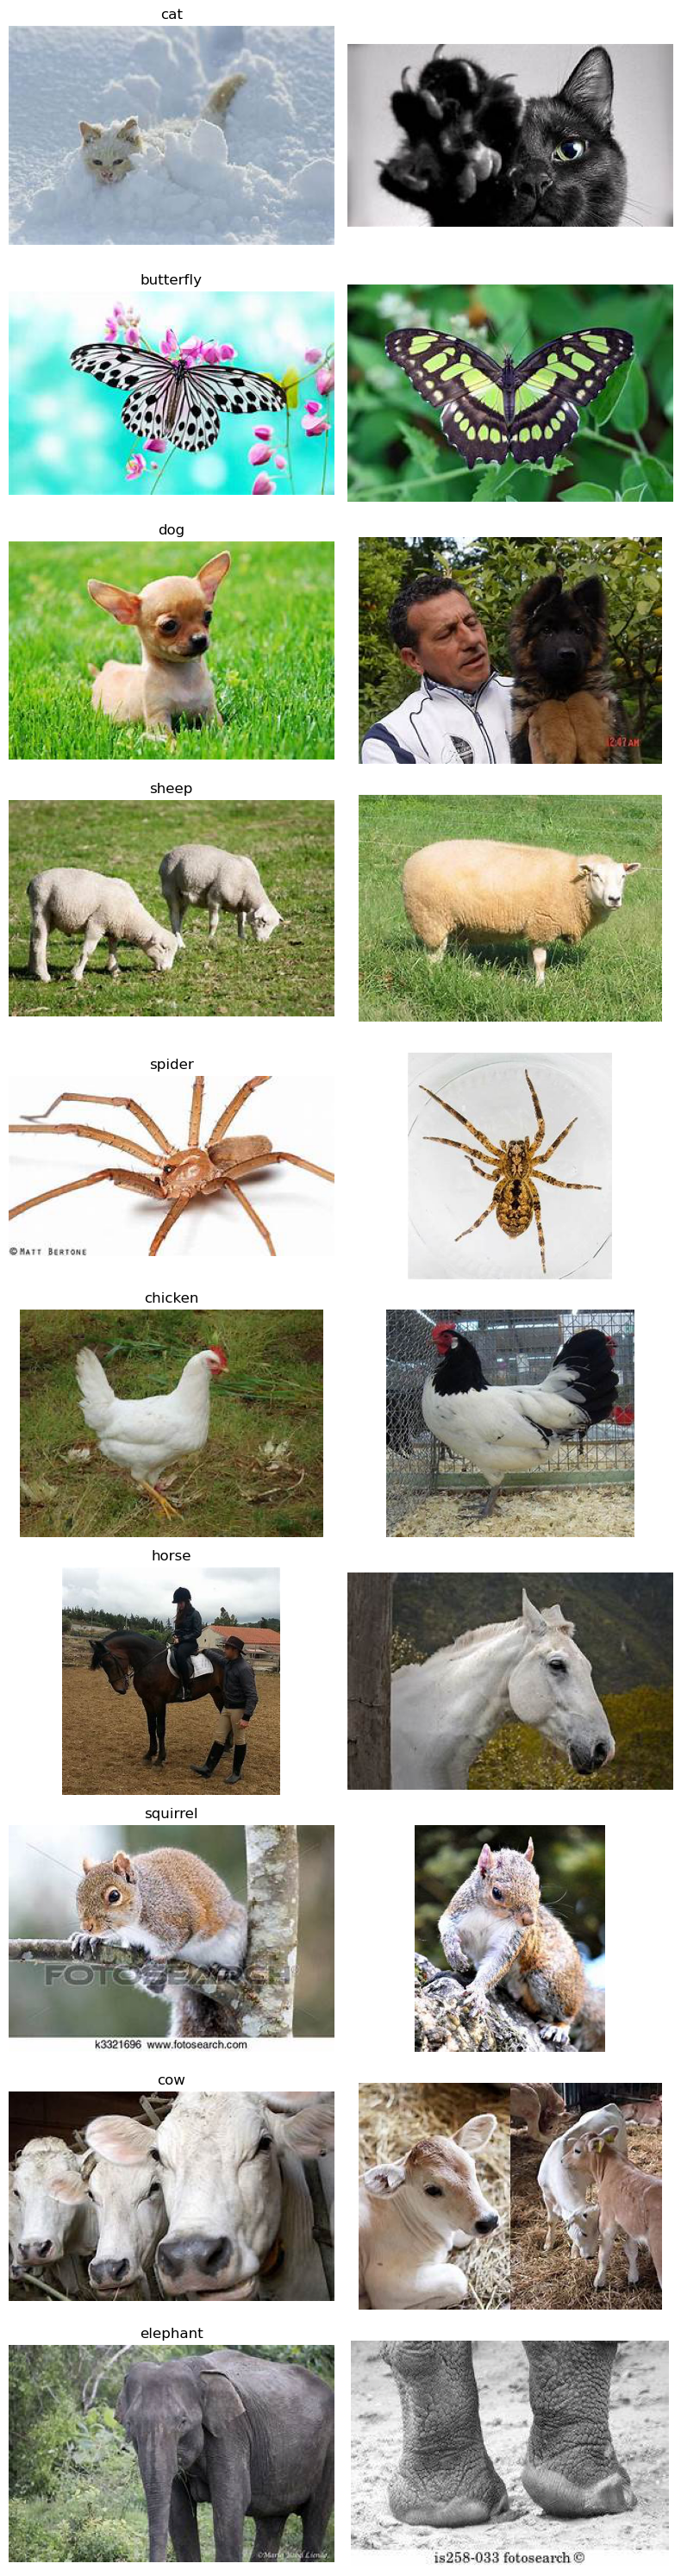

In [20]:
num_samples = 2

fig, axs = plt.subplots(len(categories), num_samples, figsize=(num_samples * 4, len(categories) * 3))

for i, category in enumerate(categories):
    category_dir = os.path.join(data_dir, category)
    images = os.listdir(category_dir)
    random.shuffle(images)
    for j in range(num_samples):
        img_path = os.path.join(category_dir, images[j])
        img = Image.open(img_path)
        axs[i, j].imshow(img)
        axs[i, j].axis('off')
        if j == 0:
            axs[i, j].set_title(category)

plt.tight_layout()
plt.show()



## And the finally - identifying Potential Data Quality Issues

Make sure there aren’t missing or corrupt files

In [33]:
def check_corrupted_files(data_dir):
    """
    Scans the dataset directory to find corrupted or unreadable image files.

    Args:
        data_dir (str): Path to the dataset directory.

    Returns:
        corrupted_files (list): List of corrupted or unreadable image file paths.
    """
    corrupted_files = []

    # Iterate over each class/category folder
    for category in os.listdir(data_dir):
        category_dir = os.path.join(data_dir, category)

        # Skip non-directory files or hidden folders
        if not os.path.isdir(category_dir) or category.startswith('.'):
            continue

        # Iterate over all images in the category folder
        for image_name in os.listdir(category_dir):
            image_path = os.path.join(category_dir, image_name)

            # Skip hidden/system files
            if image_name.startswith('.'):
                continue

            try:
                # Check if the file is empty (zero-byte file)
                if os.path.getsize(image_path) == 0:
                    print(f"Empty file detected: {image_path}")
                    corrupted_files.append(image_path)
                    continue

                # Try opening the image
                with Image.open(image_path) as img:
                    img.verify()  # Verify the image is valid

            except (IOError, OSError) as e:
                print(f" Corrupted or unreadable file: {image_path} ({e})")
                corrupted_files.append(image_path)

    return corrupted_files

corrupted_files = check_corrupted_files(data_dir)
if corrupted_files:
    print(f"\n Found {len(corrupted_files)} corrupted files.")
else:
    print("\nNo corrupted files found!")



No corrupted files found!


In [31]:
# if corrupted file is found 
for file in corrupted_files:
    os.remove(file)
    print(f"Deleted: {file}")